

> Importing Dataset



In [1]:
import pandas as pd
data = pd.read_csv("creditcard.csv")
data.shape  #checking the shape of the dataset

(107046, 31)

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
data = data.dropna(how='any',axis=0)  #dropping rows with NULL values



> Data Imbalance



In [4]:
Non_fraud = data[data['Class']==0]['Class'].count()
Fraud = data[data['Class']==1]['Class'].count()
Fraud_percent = Fraud/(Fraud+Non_fraud)
Non_Fraud_percent = Non_fraud/(Fraud+Non_fraud)
print('Total Number of Non-Fraud Transactions:',Non_fraud)
print('Total Number of Fraud Transcations:',Fraud)
print('Percentage of Non-Fraud Transactions:',Non_Fraud_percent*100,'%')
print('Percentage of Fraud Transactions:',Fraud_percent*100,'%')

Total Number of Non-Fraud Transactions: 106810
Total Number of Fraud Transcations: 235
Percentage of Non-Fraud Transactions: 99.78046615909197 %
Percentage of Fraud Transactions: 0.21953384090802933 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


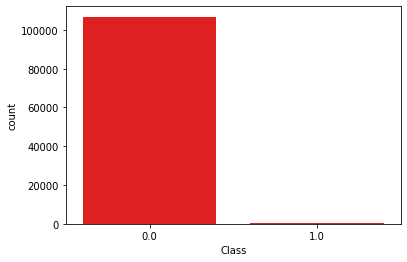

In [5]:
import seaborn as sns

sns.countplot(data['Class'],data=data,color='red')




*   We clearly have come across a Class imbalanced dataset (number of Non-Fraud transactions is dominating the dataset).


*   Hence, the model will always tend to misclassify even Fraud transactions into Non-Fraud due to this imbalance.


*   We must try to resample the datapoints inorder to overcome this Imbalance.





/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


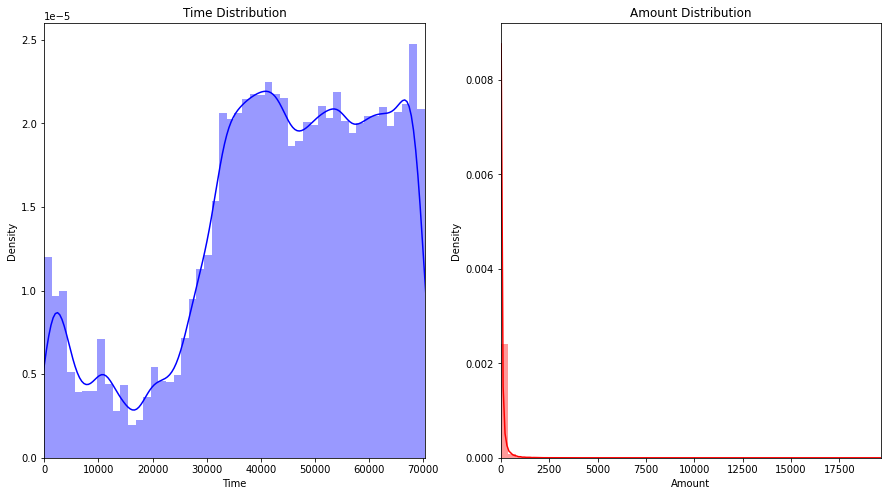

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))

plt.subplot(1,2,1)

sns.distplot(data['Time'],color='blue')
plt.title('Time Distribution')
plt.xlim([min(data['Time']),max(data['Time'])])

plt.subplot(1,2,2)

sns.distplot(data['Amount'],color='red')
plt.title('Amount Distribution')
plt.xlim([min(data['Amount']),max(data['Amount'])])

plt.show()



> Scaling is done since the Data points are not Normally Distributed.



In [7]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

data['Scaled_Time'] = scal.fit_transform(data['Time'].values.reshape(-1,1))
data['Scaled_Amount'] = scal.fit_transform(data['Amount'].values.reshape(-1,1))

data.drop(['Time','Amount'],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,-2.492569,0.204603
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-2.492569,-0.358170
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,-2.492512,1.081874
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,-2.492512,0.104558
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-2.492456,-0.100397


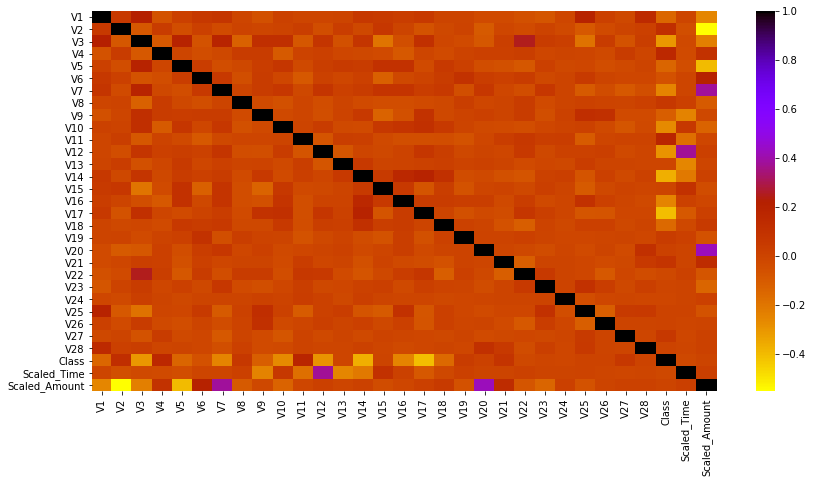

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),cmap='gnuplot_r')

In [10]:
print(data.corr()['Class'].sort_values(ascending = False))

Class            1.000000
V11              0.181361
V4               0.161269
V2               0.121526
V21              0.088744
V27              0.063883
V8               0.059624
V19              0.044073
V20              0.012235
V28              0.009220
V25              0.008701
V26              0.006176
Scaled_Amount    0.003383
V15              0.001143
V13             -0.002931
V23             -0.005879
V24             -0.009851
Scaled_Time     -0.015503
V22             -0.018004
V6              -0.059887
V9              -0.114625
V5              -0.139858
V1              -0.146754
V18             -0.154981
V7              -0.245636
V16             -0.249897
V10             -0.264604
V12             -0.291451
V3              -0.301200
V14             -0.368841
V17             -0.404573
Name: Class, dtype: float64




> We drop the Data Columns which contribute very less or does not contribute at all to the model . We select these columns with the help of the Heat Map visualisation done above.



In [11]:
X = data.drop(['Class','V4','V2','V21','V19','V20','V8','V27','V28','Scaled_Amount','V26','V25','V22','V23','V15','V13','V24','Scaled_Time','V6','V5','V9','V1','V18'],axis=1)
y = data['Class']

In [12]:
print(X.head())
print(y.head())

         V3        V7       V10  ...       V14       V16       V17
0  2.536347  0.239599  0.090794  ... -0.311169 -0.470401  0.207971
1  0.166480 -0.078803 -0.166974  ... -0.143772  0.463917 -0.114805
2  1.773209  0.791461  0.207643  ... -0.165946 -2.890083  1.109969
3  1.792993  0.237609 -0.054952  ... -0.287924 -1.059647 -0.684093
4  1.548718  0.592941  0.753074  ... -1.119670 -0.451449 -0.237033

[5 rows x 8 columns]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64



**SMOTE :**

*   Synthetic Minority Oversampling Technique
*   One approach to addressing imbalanced datasets is to oversample the minority class. 
*   The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. 
*   Instead, new examples can be synthesized from the existing examples. 
*   This is a type of data augmentation for the minority class and is referred to as the SMOTE.



In [13]:
from imblearn.over_sampling import SMOTE

r_smote = SMOTE(random_state =0)
r_smote.fit(X,y)
X_smote,y_smote = r_smote.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [14]:
import collections
print("No. of Non-Fraud Transactions in under sampled data: ",collections.Counter(y_smote[y_smote==0]))
print("No. of Fraud Transactions in under sampled data: ",collections.Counter(y_smote[y_smote==1]))

No. of Non-Fraud Transactions in under sampled data:  Counter({0.0: 106810})
No. of Fraud Transactions in under sampled data:  Counter({1.0: 106810})


We have successfully resampled the datapoints for the Fraud class.



> Random Forest



In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0,replacement =True)
rus.fit(X,y)
X_under_sampled,y_under_sampled = rus.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
from sklearn.model_selection import train_test_split
X_SMOTE_train,X_SMOTE_test,y_SMOTE_train,y_SMOTE_test = train_test_split(X_smote,y_smote,random_state=0,train_size=0.7)
X_under_train,X_under_test,y_under_train,y_under_test = train_test_split(X_under_sampled,y_under_sampled,random_state=0,train_size=0.7)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,accuracy_score
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 1)

In [18]:
param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [19]:
CV_rfc_under = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc_under.fit(X_under_train, y_under_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

Confusion matrix:
 [[31674   291]
 [ 1160 30961]]


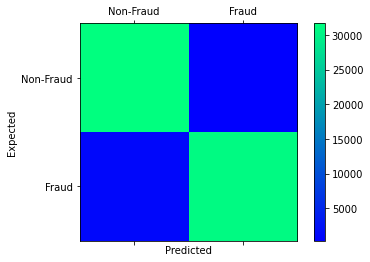

In [20]:
rfc_smote = RandomForestClassifier(random_state=1, max_features='log2', n_estimators= 100, max_depth=8, criterion='entropy')
rfc_smote.fit(X_SMOTE_train, y_SMOTE_train)
pred_smote = rfc_smote.predict(X_SMOTE_test)


conf_mat = confusion_matrix(y_true=y_SMOTE_test, y_pred=pred_smote)
print('Confusion matrix:\n', conf_mat)
labels = ['Non-Fraud', 'Fraud']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.winter)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [21]:
print(classification_report(y_SMOTE_test,pred_smote))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     31965
         1.0       0.99      0.96      0.98     32121

    accuracy                           0.98     64086
   macro avg       0.98      0.98      0.98     64086
weighted avg       0.98      0.98      0.98     64086

